<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-03_DACON_AI_Training/TeamZero%EC%A0%9C%EC%A3%BC%ED%8A%B9%EC%82%B0%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **한글 폰트 설치**

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# basic
import time
import random
import math

#data analytics
import numpy as np
import pandas as pd

#Math
import scipy as sp
import statsmodels.api as sm

#web crawling
import requests
from bs4 import BeautifulSoup

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')

# 데이터 읽어오기
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
international_trade_df = pd.read_csv('./international_trade.csv')

# **Heatmap출력**

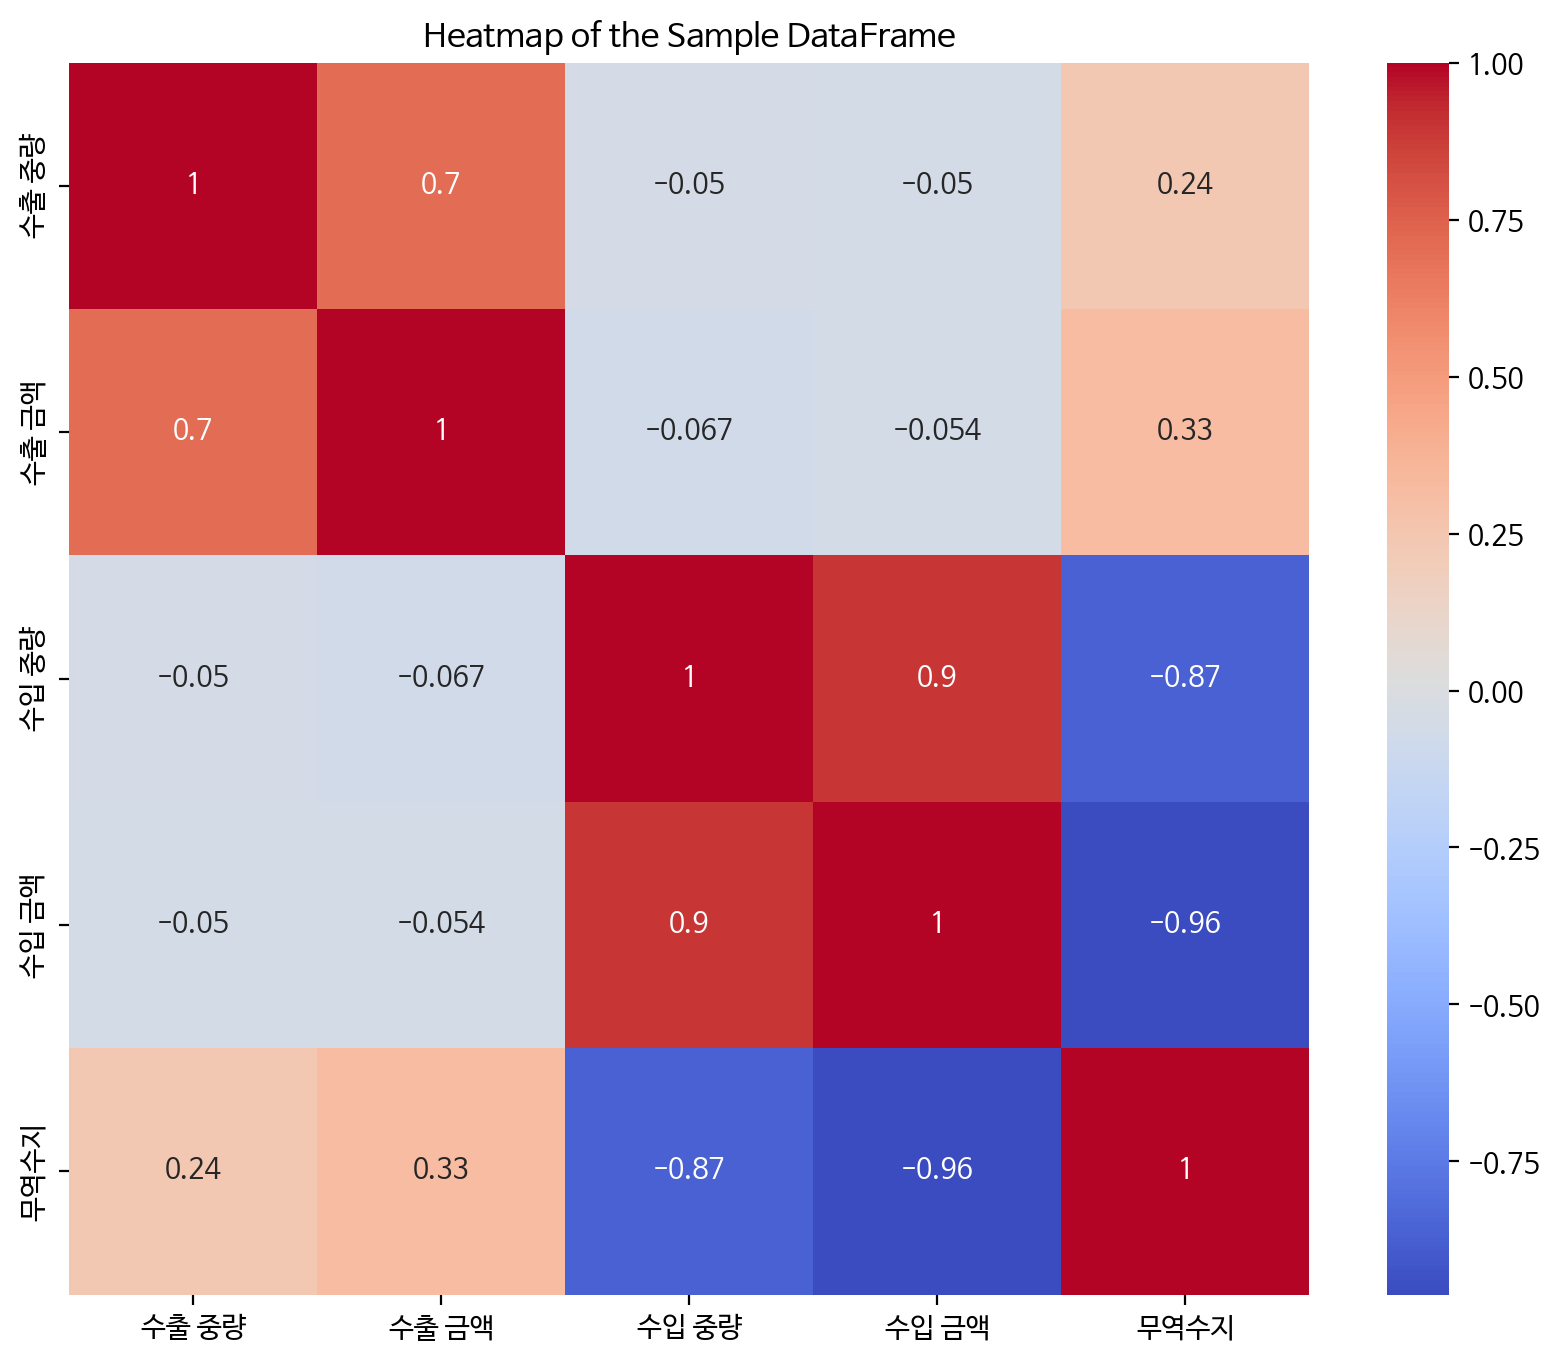

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame(international_trade_df)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of the Sample DataFrame")
plt.show()

In [ ]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1092 non-null   object
 1   timestamp    1092 non-null   object
 2   item         1092 non-null   object
 3   corporation  1092 non-null   object
 4   location     1092 non-null   object
dtypes: object(5)
memory usage: 42.8+ KB


(None, None)

In [ ]:
train_df.isnull().sum(), test_df.isnull().sum(), international_trade_df.isnull().sum() #결축치 없음

(ID             0
 timestamp      0
 item           0
 corporation    0
 location       0
 supply(kg)     0
 price(원/kg)    0
 dtype: int64,
 ID             0
 timestamp      0
 item           0
 corporation    0
 location       0
 dtype: int64,
 기간       0
 품목명      0
 수출 중량    0
 수출 금액    0
 수입 중량    0
 수입 금액    0
 무역수지     0
 dtype: int64)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# 수입 중량열 제거
train_df_excluded = train_df.drop('supply(kg)', axis=1)
test_df_excluded = test_df

# 인코딩
train_df_excluded_encoded = train_df_excluded.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
test_df_excluded_encoded = test_df_excluded.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

# 수입 중량제외 StandardScaler로 정규화 시키기
scaler_excluded = StandardScaler()
train_df_excluded_normalized = scaler_excluded.fit_transform(train_df_excluded_encoded.drop(['price(원/kg)', 'ID', 'timestamp'], axis=1))
test_df_excluded_normalized = scaler_excluded.transform(test_df_excluded_encoded.drop(['ID', 'timestamp'], axis=1))

# 데이터 스플릿 준비
X_train_excluded_norm = train_df_excluded_normalized
y_train_excluded_norm = train_df_excluded_encoded['price(원/kg)']

# 데이터 스플릿 (비율 0.2)
X_train_excluded_norm_split, X_val_excluded_norm_split, y_train_excluded_norm_split, y_val_excluded_norm_split = train_test_split(
    X_train_excluded_norm, y_train_excluded_norm, test_size=0.1, random_state=42)

# 선형회귀 모델 설정
lr_model_excluded_norm = LinearRegression()
lr_model_excluded_norm.fit(X_train_excluded_norm_split, y_train_excluded_norm_split)

# Predict on the normalized validation set
y_val_pred_excluded_norm = lr_model_excluded_norm.predict(X_val_excluded_norm_split)

# rmse값 계산
rmse_excluded_norm = mean_squared_error(y_val_excluded_norm_split, y_val_pred_excluded_norm, squared=False)

# Predicting on the normalized test dataset
test_predictions_excluded_norm = lr_model_excluded_norm.predict(test_df_excluded_normalized)

# 예측가격 정규화를 위해 DataFrame생성
submission_excluded_norm = pd.DataFrame({
    "ID": test_df_excluded["ID"],
    "predicted_price(원/kg)": test_predictions_excluded_norm
})

# 정확도 및 rmse값 출력
r_squared = r2_score(y_val_excluded_norm_split, y_val_pred_excluded_norm)
print(f"{rmse_excluded_norm:.3f}, {r_squared:.3f}")

submission_excluded_norm

1832.402, 0.104


,ID,predicted_price(원/kg)
0,TG_A_J_20230304,2152.034418
1,TG_A_J_20230305,2152.034418
2,TG_A_J_20230306,2152.034418
3,TG_A_J_20230307,2152.034418
4,TG_A_J_20230308,2152.034418
...,...,...
1087,RD_F_J_20230327,1577.528118
1088,RD_F_J_20230328,1577.528118
1089,RD_F_J_20230329,1577.528118
1090,RD_F_J_20230330,1577.528118


In [ ]:
df = pd.read_csv('sample_submission.csv')
df

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0
...,...,...
1087,RD_F_J_20230327,0
1088,RD_F_J_20230328,0
1089,RD_F_J_20230329,0
1090,RD_F_J_20230330,0


# **sample_submission.csv에 예측값 저장**

In [ ]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['answer'] = submission_excluded_norm['predicted_price(원/kg)']

# Saving the updated dataframe to a new CSV file
updated_submission_file_path = 'sample_submission.csv'
sample_submission_df.to_csv(updated_submission_file_path, index=False)